# Monitoreo de Espacios Verdes - 0

## Objetivo

Buscamos monitorear de una forma automatizada ciertos parametros relacionados a espacios verdes de distintos puntos del pais. En esta instancia nos concentramos 
en la ciudad de Córdoba (sin embargo el enfoque es general). Los datos respecto a espacios verdes fueron tomados de:

- [Atlas Espacios Verdes](https://github.com/bitsandbricks/atlas_espacios_verdes)

In [1]:
import geopandas as gpd

Los datos concernientes a Córdoba capital los extraemos del set general de datos

In [2]:
gpd_box = gpd.read_file("../data/cba/cordoba.geojson")
gpd_atlas = gpd.read_file("../data/osm/areas_verdes_urbanas_argentina.shp")
# llevamos ambos a un mismo crs

In [3]:
gpd_box.to_crs(epsg=4326, inplace=True)
gpd_atlas.to_crs(epsg=4326, inplace=True)

In [4]:
gpd_cba = gpd.overlay(gpd_atlas, gpd_box)

In [5]:
gpd_cba.to_file("../data/cba/espacios-verdes-cba.gpkg", driver="GPKG")

In [6]:
gpd_cba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osm_id      757 non-null    object  
 1   fclass      757 non-null    object  
 2   name        191 non-null    object  
 3   cluster_id  757 non-null    float64 
 4   area_m2     757 non-null    float64 
 5   geometry    757 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 35.6+ KB


<AxesSubplot:>

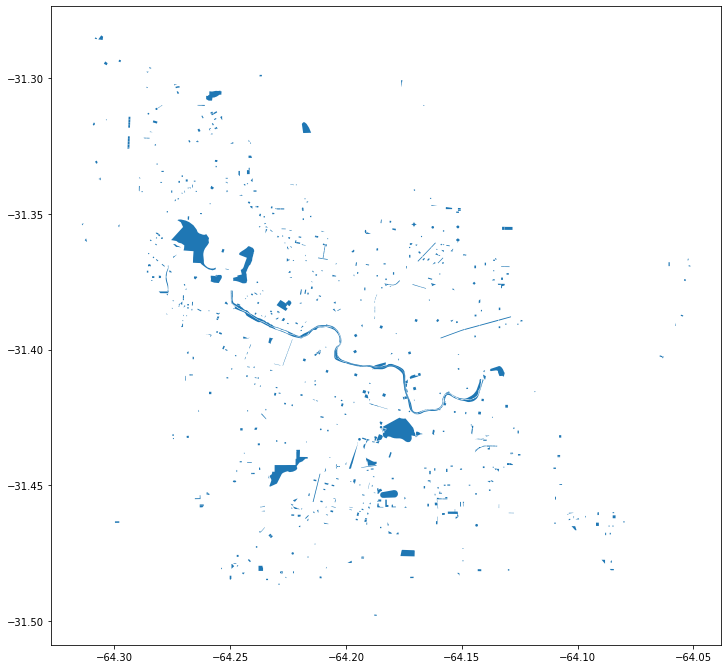

In [7]:
gpd_cba.plot(figsize=(12, 12))

La idea en lo que sigue es obtener la imagen satelital correspondiente a la zona y generar los parametros correspondientes (sin demasiada complejidad).